In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import  pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import scipy
import os
from sklearn.decomposition import PCA
import shap

#from ucimlrepo import fetch_ucirepo

import warnings
warnings.filterwarnings('ignore')

#from mappings import *
from functs import *

/home/xannadoo/miniconda3/envs/AFexam/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Constants

In [2]:
seed = 0
np.random.seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)

In [3]:
# from_begin=True to not include information from the first and second semester

features, features_full, labels = load_data(from_begin=True, nationality=False)

features_full.head(10)

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_grade,mothers_qualification,fathers_qualification,mothers_occupation,...,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,unemployment_rate,inflation_rate,gdp,graduated
0,single,2nd_phase_general_contingent,5,animation_and_multimedia_design,1,upper_secondary,122.0,upper_secondary,upper_secondary,unskilled,...,0,1,1,0,20,0,10.8,1.4,1.74,0
1,single,international_student_bachelor,1,tourism,1,upper_secondary,160.0,upper_secondary,higher_education,skilled,...,0,0,1,0,19,0,13.9,-0.3,0.79,1
2,single,1st_phase_general_contingent,5,communication_design,1,upper_secondary,122.0,basic,basic,unskilled,...,0,0,1,0,19,0,10.8,1.4,1.74,0
3,single,2nd_phase_general_contingent,2,journalism_and_communication,1,upper_secondary,122.0,basic,basic,unskilled,...,0,1,0,0,20,0,9.4,-0.8,-3.12,1
4,married,over_23_years_old,1,social_service,0,upper_secondary,100.0,basic,basic,unskilled,...,0,1,0,0,45,0,13.9,-0.3,0.79,1
5,married,over_23_years_old,1,management,0,upper_secondary,133.1,basic,basic,unskilled,...,1,1,1,0,50,0,16.2,0.3,-0.92,1
6,single,1st_phase_general_contingent,1,nursing,1,upper_secondary,142.0,upper_secondary,basic,skilled,...,0,1,0,1,18,0,15.5,2.8,-4.06,1
7,single,3rd_phase_general_contingent,4,tourism,1,upper_secondary,119.0,basic,basic,unskilled,...,0,0,1,0,22,0,15.5,2.8,-4.06,0
8,single,1st_phase_general_contingent,3,social_service,1,upper_secondary,137.0,upper_secondary,upper_secondary,unskilled,...,0,1,0,1,21,1,16.2,0.3,-0.92,1
9,single,1st_phase_general_contingent,1,social_service,1,upper_secondary,138.0,upper_secondary,upper_secondary,skilled,...,1,0,0,0,18,0,8.9,1.4,3.51,0


In [4]:
protected_cols=[x for x in features.columns if ('occupation' in x) or (x=='gender')]
groups = features[protected_cols]

In [5]:
features.head(10)

,application_order,daytime/evening_attendance,previous_qualification_grade,admission_grade,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,...,mothers_occupation_skilled,fathers_occupation_managerial,fathers_occupation_other,fathers_occupation_professional,fathers_occupation_skilled,marital_status_divorced,marital_status_facto union,marital_status_legally separated,marital_status_married,marital_status_widower
0,5,1,122.0,127.3,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,160.0,142.5,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,5,1,122.0,124.8,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,122.0,119.6,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,100.0,141.5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,133.1,114.8,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,1,0
6,1,1,142.0,128.4,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
7,4,1,119.0,113.1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,3,1,137.0,129.3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,138.0,123.0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [6]:
features.describe()

,application_order,daytime/evening_attendance,previous_qualification_grade,admission_grade,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,...,mothers_occupation_skilled,fathers_occupation_managerial,fathers_occupation_other,fathers_occupation_professional,fathers_occupation_skilled,marital_status_divorced,marital_status_facto union,marital_status_legally separated,marital_status_married,marital_status_widower
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,0.890823,132.613314,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,...,0.352622,0.031193,0.047920,0.106465,0.388110,0.020570,0.005651,0.001356,0.085669,0.000904
std,1.313793,0.311897,13.188332,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,...,0.477840,0.173860,0.213622,0.308466,0.487375,0.141954,0.074969,0.036806,0.279906,0.030059
min,0.000000,0.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,133.100000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,140.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,1.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Data
rows_graduated = len(labels[labels.graduated == 1].index)
rows_not_graduated = len(labels[labels.graduated == 0].index)
total_rows = len(labels)

# Calculate percentages
dropout_percentage = 100 * rows_graduated / total_rows
not_dropout_percentage = 100 * rows_not_graduated / total_rows

print(f"Number of rows graduated is {rows_graduated}, corresponding to {rows_graduated/len(features_full):.2%} of the data")
print(f"Number of rows not graduated is {rows_not_graduated}, corresponding to {rows_not_graduated/len(features_full):.2%} of the data")

Number of rows graduated is 2209, corresponding to 49.93% of the data
Number of rows not graduated is 2215, corresponding to 50.07% of the data


## Representations bias: higher education institutions with a majority of females are overrepresented

In Portugal, 49% of 25-34 year-old women had a tertiary qualification in 2020 compared to 35% of their male peers.


https://www.oecd-ilibrary.org/sites/db0e552c-en/index.html?itemId=/content/component/db0e552c-en

The higher imbalance ratio in our dataset compared to OECD data could be attributed to the composition of higher education institutions. For instance, programs like Nursing and Veterinary Nursing, which typically enroll a higher number of females, may contribute to this imbalance. Conversely, fields such as Law Enforcement Studies and more technical courses, which tend to attract more males, might not be represented in our dataset, further skewing the gender distribution.

OECD Imbalance Ratio is 1.40
Number of rows male graduates: 548, corresponding to 12.39% of the data
Number of rows female graduates: 1661, corresponding to 37.55% of the data
Dataset Imbalance is 3.03



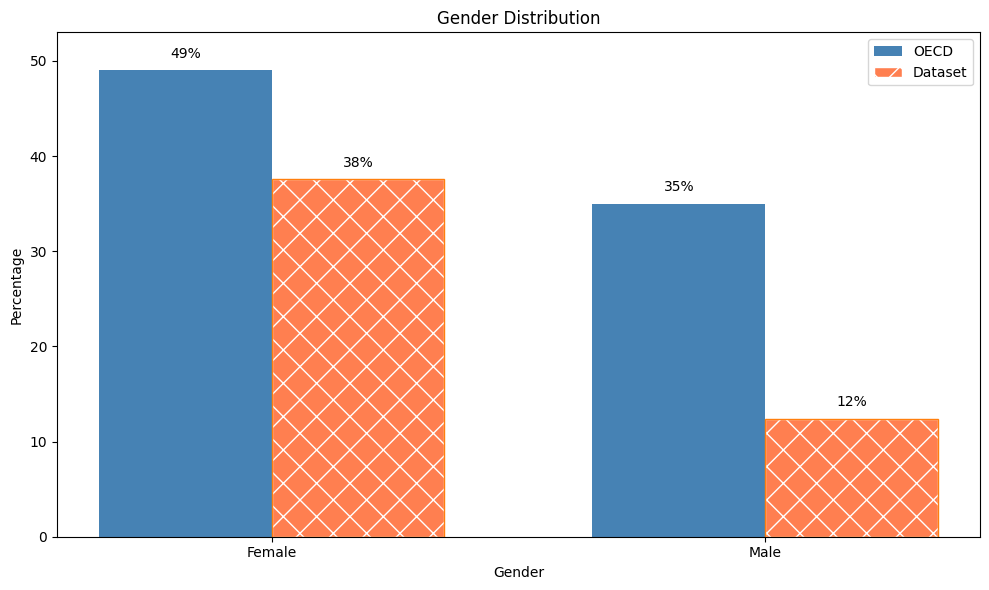

In [8]:
# OECD Data
female_tertiary = 49  # percentage of 25-34 year-old women with tertiary qualification
male_tertiary = 35    # percentage of 25-34 year-old men with tertiary qualification

print(f"OECD Imbalance Ratio is {female_tertiary/male_tertiary:.2f}")

# Data: Calculate percentages
rows_male = len(features[(features.gender == 1) & (labels.graduated == 1)].index)
rows_female = len(features[(features.gender == 0) & (labels.graduated == 1)].index)
total_rows = len(features)

male_percentage = 100 * rows_male / total_rows
female_percentage = 100 * rows_female / total_rows
print(f"Number of rows male graduates: {rows_male}, corresponding to {rows_male/total_rows:.2%} of the data")
print(f"Number of rows female graduates: {rows_female}, corresponding to {rows_female/total_rows:.2%} of the data")
print(f"Dataset Imbalance is {rows_female/rows_male:.2f}\n")

labels_data = ['Male', 'Female']
values_data = [rows_male, rows_female]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(2)

# Bar plot for female tertiary qualification rates
ax.bar(index[0] - bar_width/2, female_tertiary, bar_width, color='steelblue',  label='OECD')
ax.bar(index[0] + bar_width/2, female_percentage, bar_width, color='coral',hatch='X', edgecolor='white',zorder=0, label='Dataset')
ax.bar(index[0] + bar_width/2, female_percentage, bar_width, color='none', edgecolor='tab:orange')

ax.bar(index[1] - bar_width/2, male_tertiary, bar_width, color='steelblue')
ax.bar(index[1] + bar_width/2, male_percentage, bar_width, color='coral',hatch='X', edgecolor='white',zorder=0)
ax.bar(index[1] + bar_width/2, male_percentage, bar_width, color='none', edgecolor='tab:orange')

ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution')
ax.set_xticks(index)
ax.set_xticklabels(['Female', 'Male'])
ax.legend()

# Add text annotations
ax.text(index[0] - bar_width/2, female_tertiary + 1, f'{female_tertiary}%', ha='center', va='bottom')
ax.text(index[1] - bar_width/2, male_tertiary + 1, f'{male_tertiary}%', ha='center', va='bottom')
ax.text(index[0] + bar_width/2, female_percentage + 1, f'{female_percentage:.0f}%', ha='center', va='bottom')
ax.text(index[1] + bar_width/2, male_percentage + 1, f'{male_percentage:.0f}%', ha='center', va='bottom')

plt.ylim(0,53)
plt.tight_layout()


plt.savefig('img/gender_disb_oecd.png', transparent=True)
plt.show()

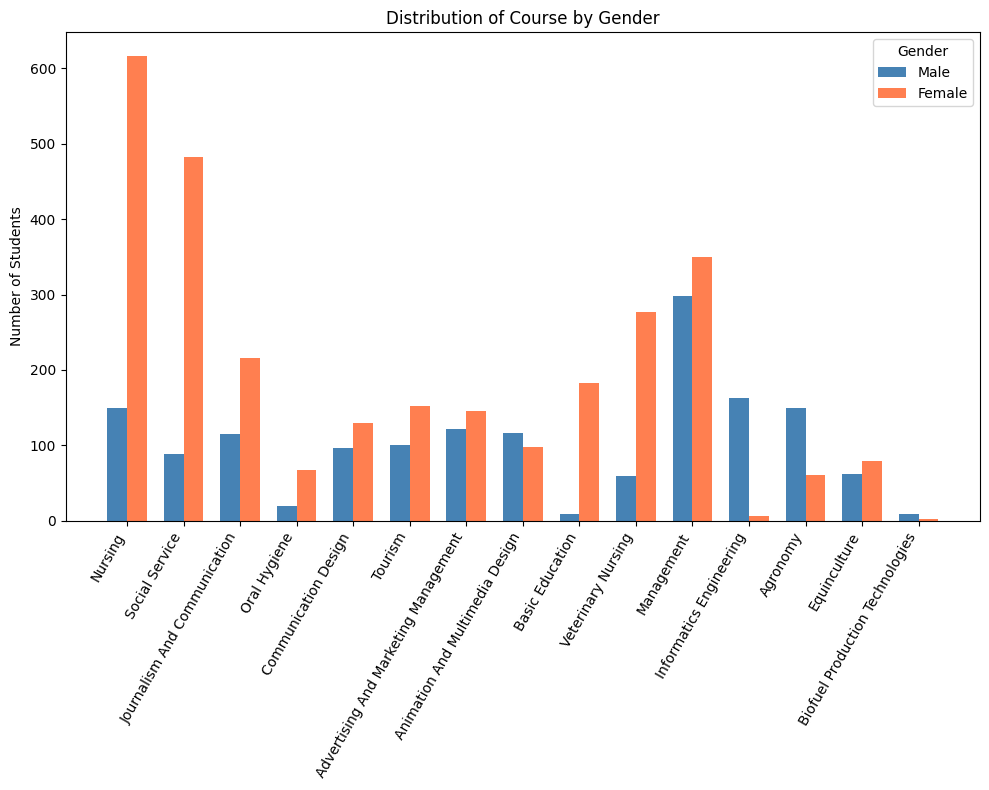

In [9]:
## we had noticed a connection between courses/scholarship holders/gender:

a = features_full[["course", "scholarship_holder"]].groupby('course').mean().reset_index().sort_values(by='scholarship_holder', ascending=False)

c_order = list(a.course)

plot_feature(feature_name='course', 
             features_full=features_full, 
             column_feature='gender',
             order=c_order,
             colors=['coral', 'steelblue'], 
             labels=['Female', 'Male'], 
             show_ratio=False, figsize=(10,8),
             save=True, file_name='course_disp_gender')

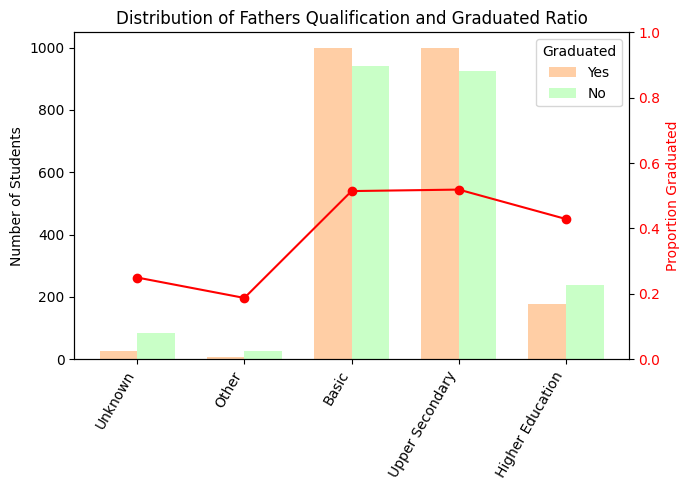

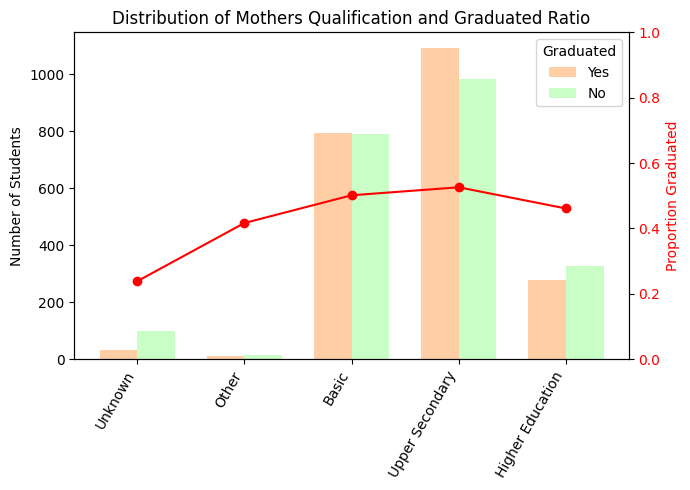

In [10]:
q_order = ['unknown','other','basic','upper_secondary','higher_education',]
plot_feature(feature_name = "fathers_qualification", 
             features_full=features_full, order=q_order,
             save=True, file_name='father_qual_grad')

plot_feature(feature_name = "mothers_qualification", 
             features_full=features_full, order=q_order,
             save=True, file_name='mother_qual_grad')

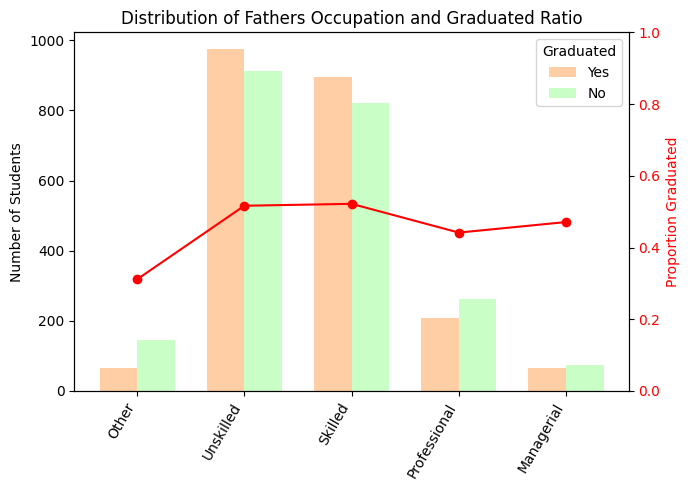

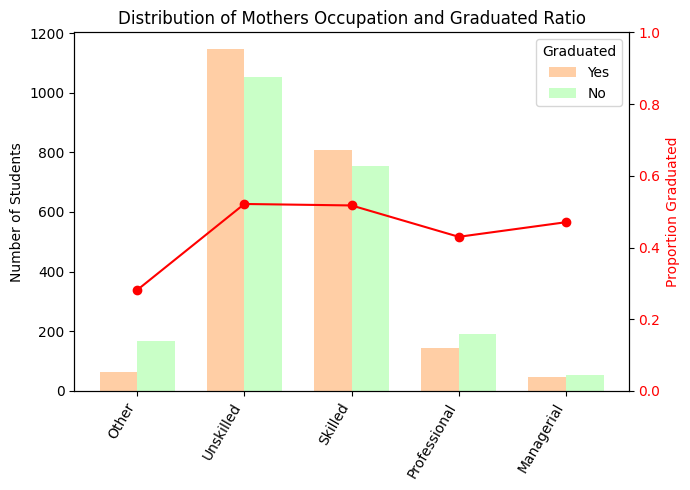

In [11]:
o_order = ['other','unskilled','skilled', 'professional', 'managerial']
plot_feature(feature_name = "fathers_occupation", 
             features_full=features_full, order=o_order,
             save=True, file_name='father_occu_grad')

plot_feature(feature_name = "mothers_occupation", 
             features_full=features_full, order=o_order,
             save=True, file_name='mother_occu_grad')

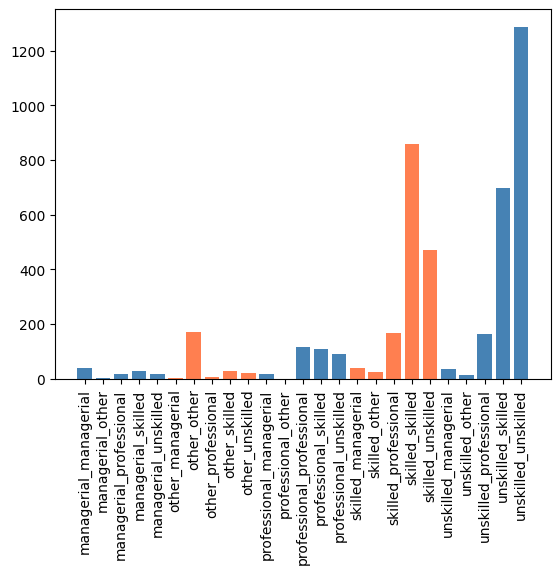

In [12]:
x = features_full.groupby(by=['mothers_occupation', 'fathers_occupation']).count().gdp.reset_index()
x.columns = ['mothers_occupation', 'fathers_occupation', 'counts']

x['occs'] = x.mothers_occupation + '_' + x.fathers_occupation

plt.bar(x.occs, x.counts, color=['steelblue']*5 + ['coral']*5)
plt.xticks(rotation=90, ha='center');

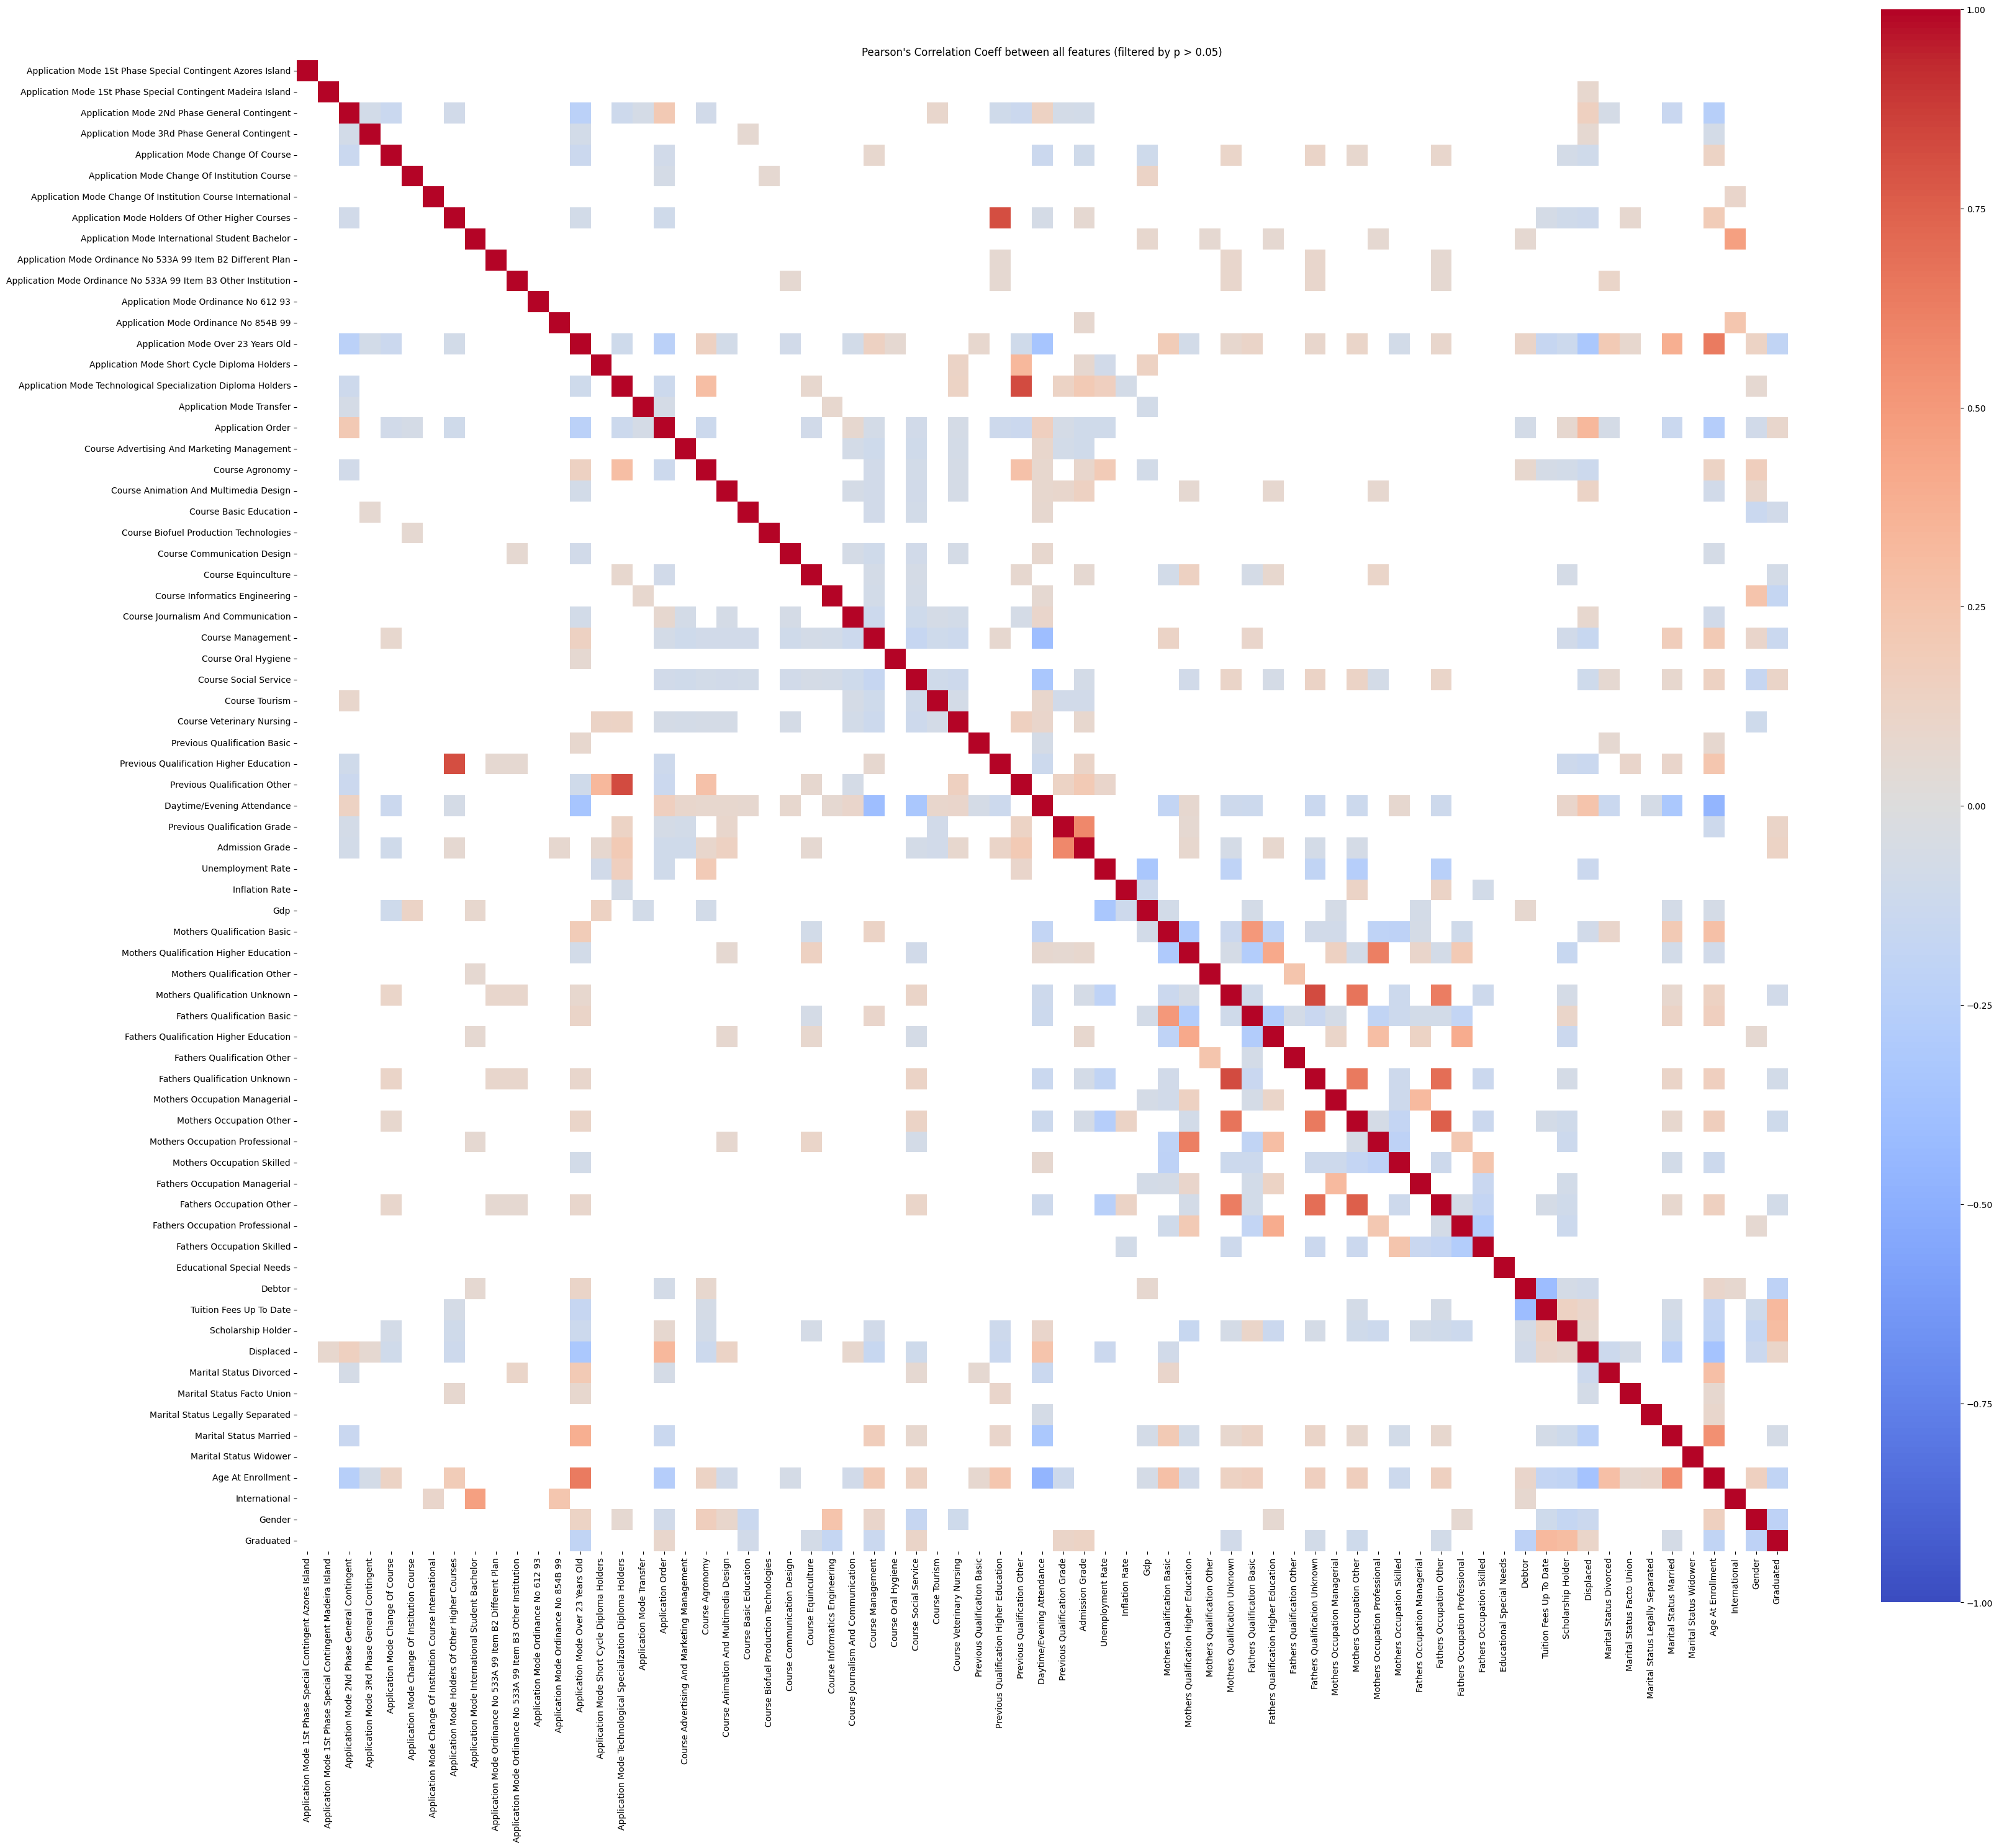

In [13]:
df = features.join(labels)
## These sections were removed
[ 'curricular_units_1st_sem_credited',
 'curricular_units_1st_sem_enrolled',
 'curricular_units_1st_sem_evaluations',
 'curricular_units_1st_sem_approved',
 'curricular_units_1st_sem_grade',
 'curricular_units_1st_sem_without_evaluations',

 'curricular_units_2nd_sem_credited',
 'curricular_units_2nd_sem_enrolled',
 'curricular_units_2nd_sem_evaluations',
 'curricular_units_2nd_sem_approved',
 'curricular_units_2nd_sem_grade',
 'curricular_units_2nd_sem_without_evaluations',]

[ 'nationality_angolan',
 'nationality_brazilian',
 'nationality_cape_verdean',
 'nationality_colombian',
 'nationality_cuban',
 'nationality_dutch',
 'nationality_english',
 'nationality_german',
 'nationality_guinean',
 'nationality_italian',
 'nationality_lithuanian',
 'nationality_mexican',
 'nationality_moldova',
 'nationality_mozambican',
 'nationality_romanian',
 'nationality_russian',
 'nationality_santomean',
 'nationality_spanish',
 'nationality_turkish',
 'nationality_ukrainian',]

## columns arranged:
# 1st semester info
# 2nd semester info 
# course info
# macro socioeconomic factors
# personal socioeconomic factors
# demographic info
# graduated
df = df[[
 'application_mode_1st_phase_special_contingent_azores_island',
 'application_mode_1st_phase_special_contingent_madeira_island',
 'application_mode_2nd_phase_general_contingent',
 'application_mode_3rd_phase_general_contingent',
 'application_mode_change_of_course',
 'application_mode_change_of_institution_course',
 'application_mode_change_of_institution_course_international',
 'application_mode_holders_of_other_higher_courses',
 'application_mode_international_student_bachelor',
 'application_mode_ordinance_no_533A_99_item_b2_different_plan',
 'application_mode_ordinance_no_533A_99_item_b3_other_institution',
 'application_mode_ordinance_no_612_93',
 'application_mode_ordinance_no_854B_99',
 'application_mode_over_23_years_old',
 'application_mode_short_cycle_diploma_holders',
 'application_mode_technological_specialization_diploma_holders',
 'application_mode_transfer',
 'application_order',
 'course_advertising_and_marketing_management',
 'course_agronomy',
 'course_animation_and_multimedia_design',
 'course_basic_education',
 'course_biofuel_production_technologies',
 'course_communication_design',
 'course_equinculture',
 'course_informatics_engineering',
 'course_journalism_and_communication',
 'course_management',
 'course_oral_hygiene',
 'course_social_service',
 'course_tourism',
 'course_veterinary_nursing',
 'previous_qualification_basic',
 'previous_qualification_higher_education',
 'previous_qualification_other',
 'daytime/evening_attendance',
 'previous_qualification_grade',
 'admission_grade',
 
 'unemployment_rate',
 'inflation_rate',
 'gdp',

 'mothers_qualification_basic',
 'mothers_qualification_higher_education',
 'mothers_qualification_other',
 'mothers_qualification_unknown',
 'fathers_qualification_basic',
 'fathers_qualification_higher_education',
 'fathers_qualification_other',
 'fathers_qualification_unknown',
 'mothers_occupation_managerial',
 'mothers_occupation_other',
 'mothers_occupation_professional',
 'mothers_occupation_skilled',
 'fathers_occupation_managerial',
 'fathers_occupation_other',
 'fathers_occupation_professional',
 'fathers_occupation_skilled',
 'educational_special_needs',
 'debtor',
 'tuition_fees_up_to_date',
 'scholarship_holder',

 'displaced',
 'marital_status_divorced',
 'marital_status_facto union',
 'marital_status_legally separated',
 'marital_status_married',
 'marital_status_widower',
 'age_at_enrollment',
 'international',
 'gender',
 'graduated']]

plot_corr(df=df, figsize=(35,30), show_specific_features=False)

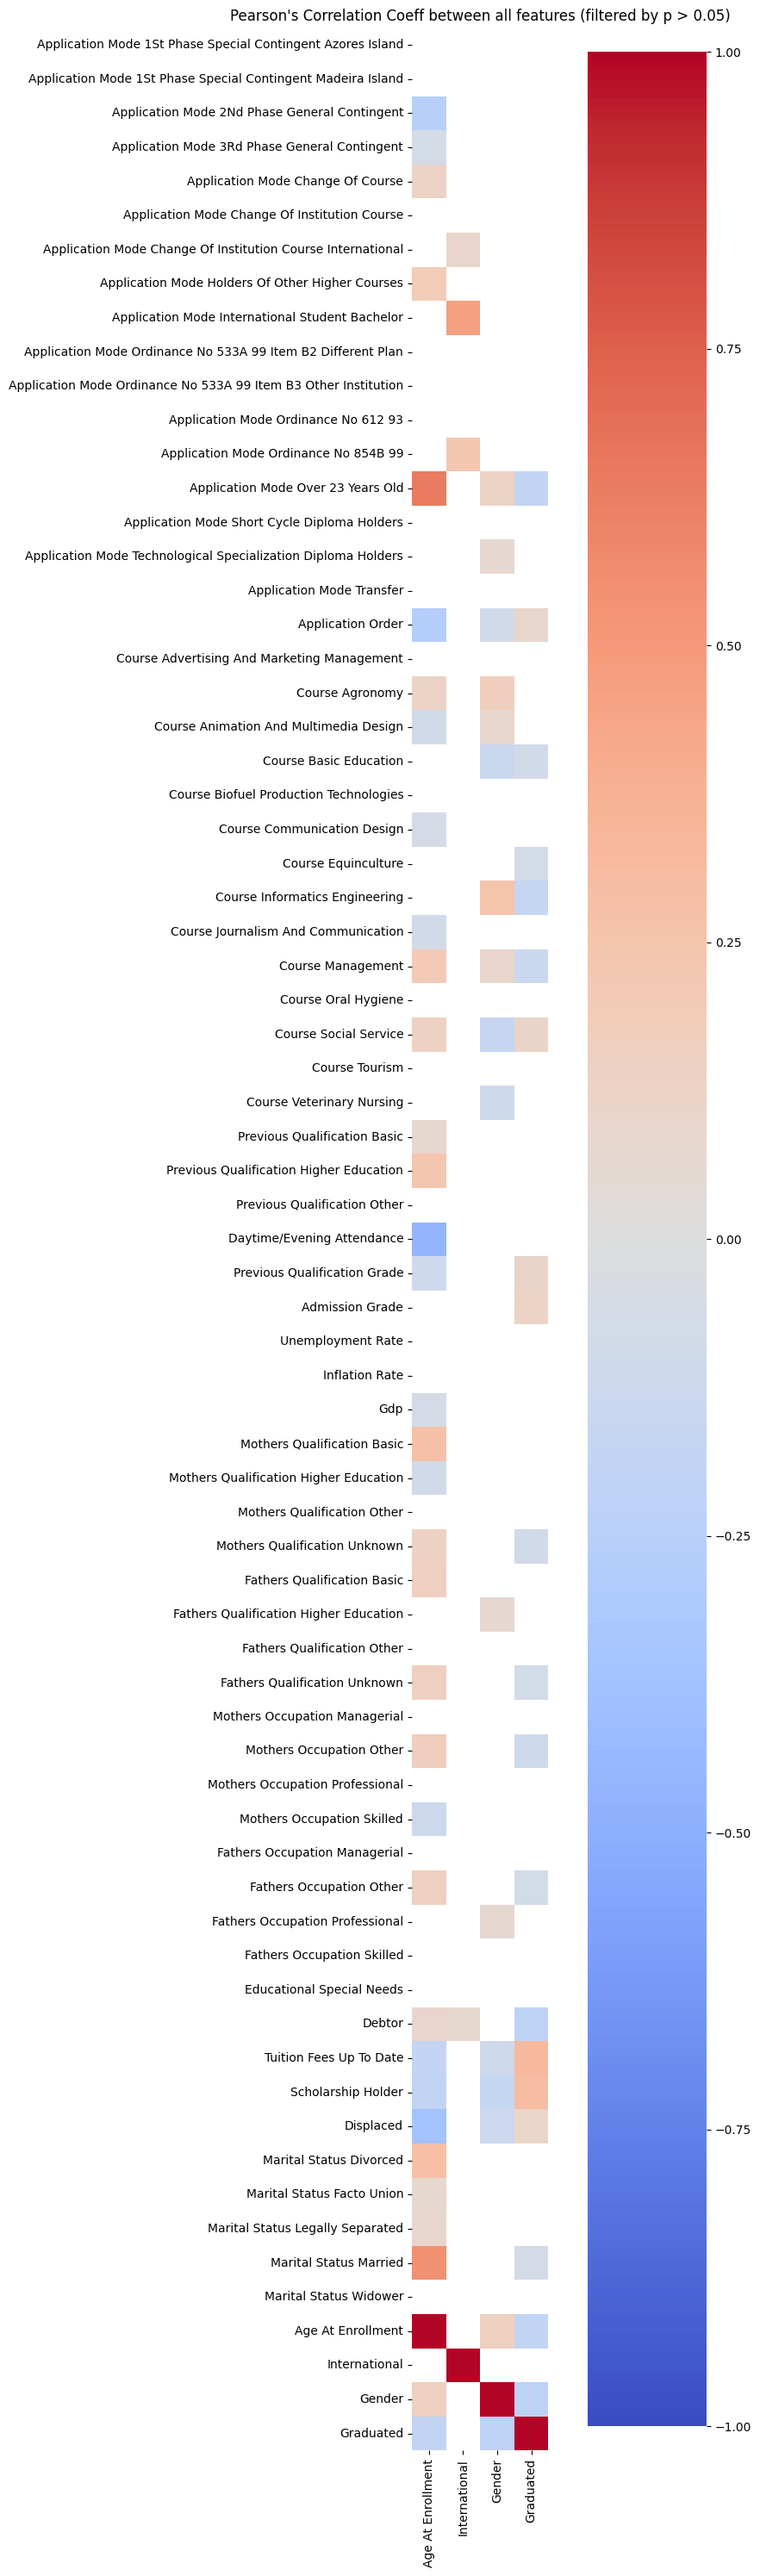

In [14]:
plot_corr(df=df,feature_cols=['age_at_enrollment','international','gender','graduated'], figsize=(10,30), show_specific_features=True)

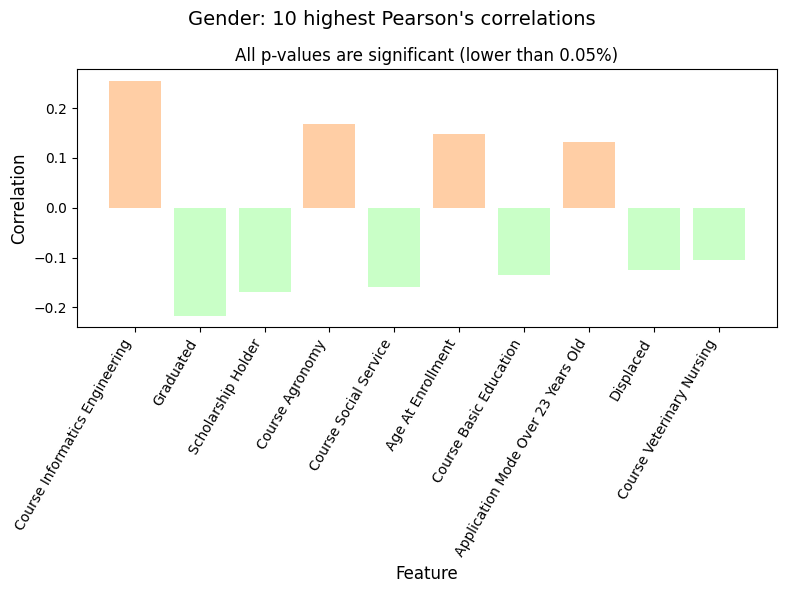

In [15]:
plot_corr(df,feature_cols=['gender'], show_specific_features=True, num_corr=10)

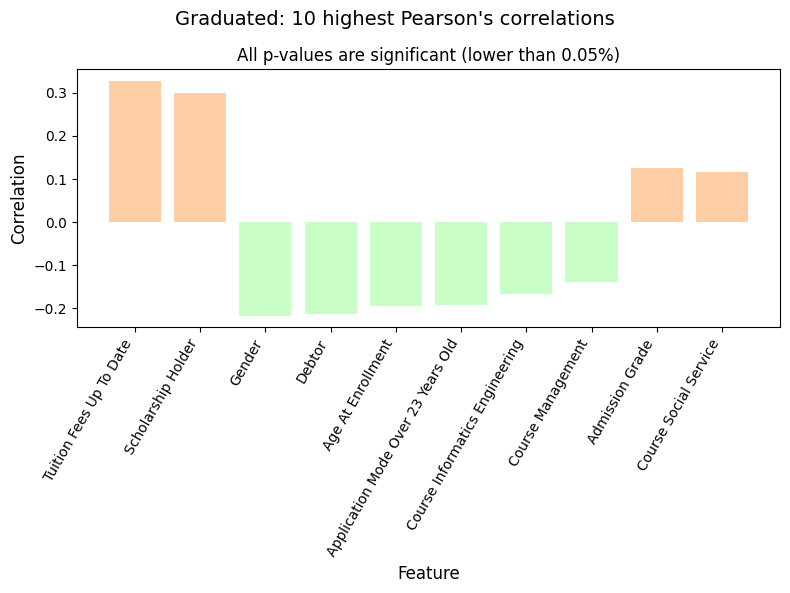

In [16]:
plot_corr(df=df,feature_cols=['graduated'], show_specific_features=True, num_corr=10)

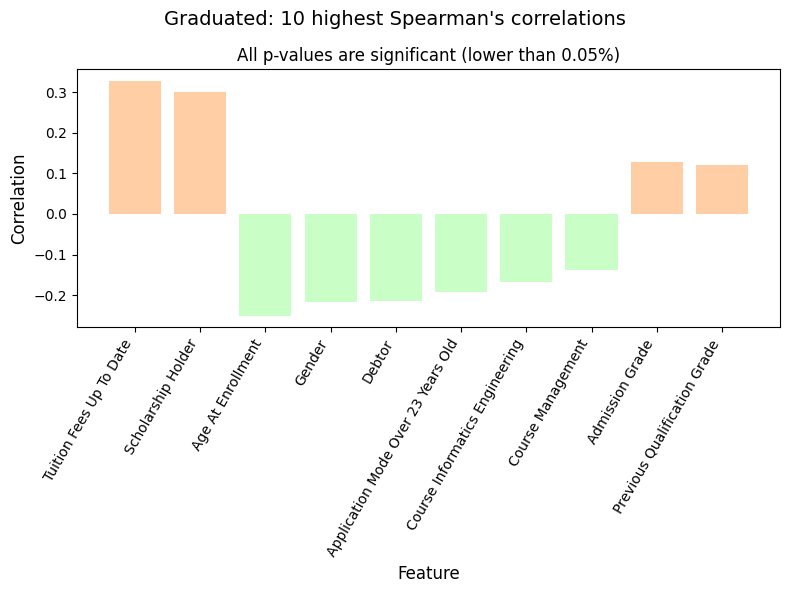

In [17]:
plot_corr(df=df,feature_cols=['graduated'], show_specific_features=True, method="spearman", num_corr=10)

# Baseline Model

In [18]:
logreg = LogisticRegression(max_iter=1000, random_state=seed)
RFclf = RandomForestClassifier(max_depth=5,random_state=seed)

In [19]:
logreg_preds = cross_validator(logreg, features, labels)

print("classification report:\n",classification_report(labels, logreg_preds))

print('*'*50)

RFclf_preds = cross_validator(RFclf, features, labels)

print(classification_report(labels, RFclf_preds))

classification report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      2215
           1       0.71      0.76      0.74      2209

    accuracy                           0.73      4424
   macro avg       0.73      0.73      0.73      4424
weighted avg       0.73      0.73      0.73      4424

**************************************************
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2215
           1       0.69      0.77      0.73      2209

    accuracy                           0.72      4424
   macro avg       0.72      0.72      0.72      4424
weighted avg       0.72      0.72      0.72      4424



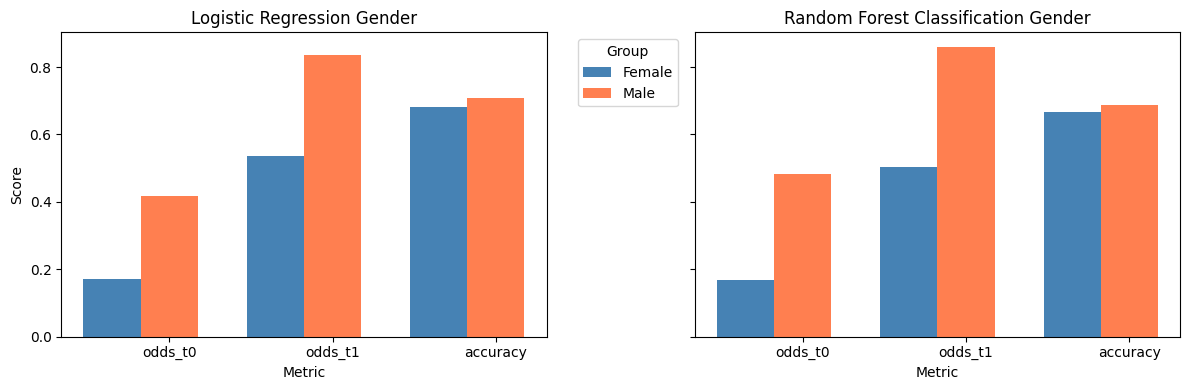

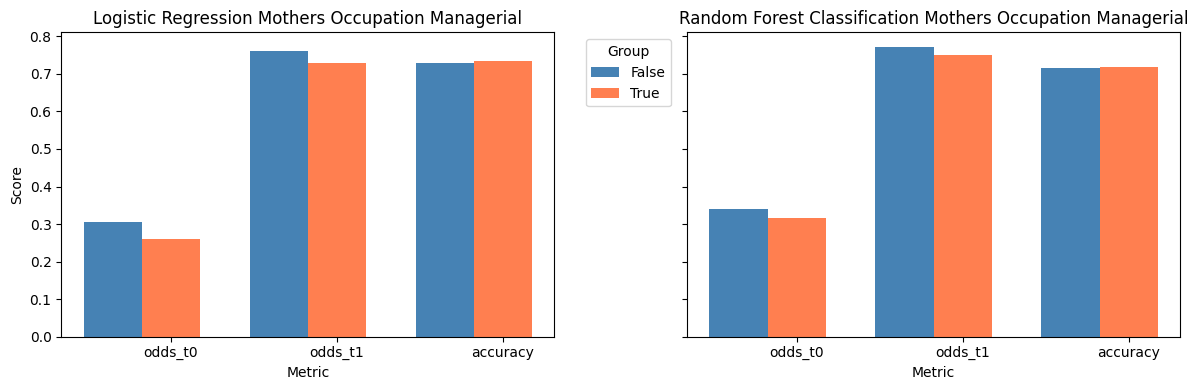

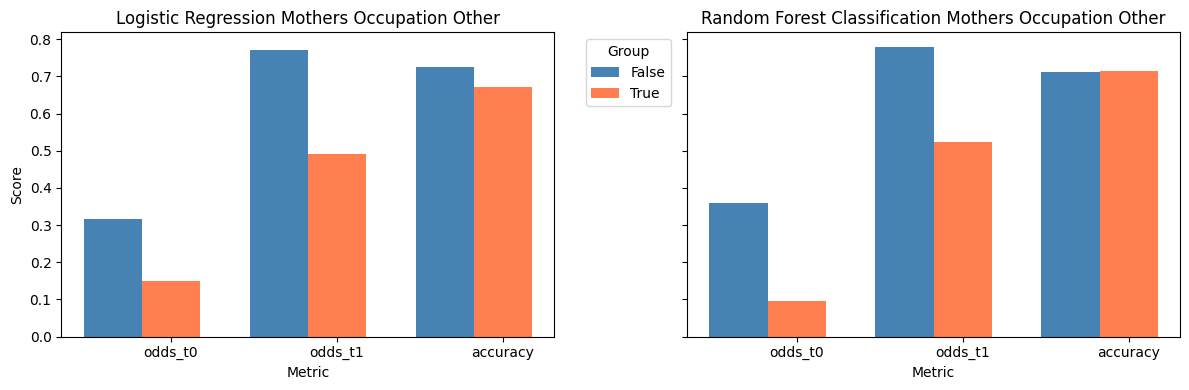

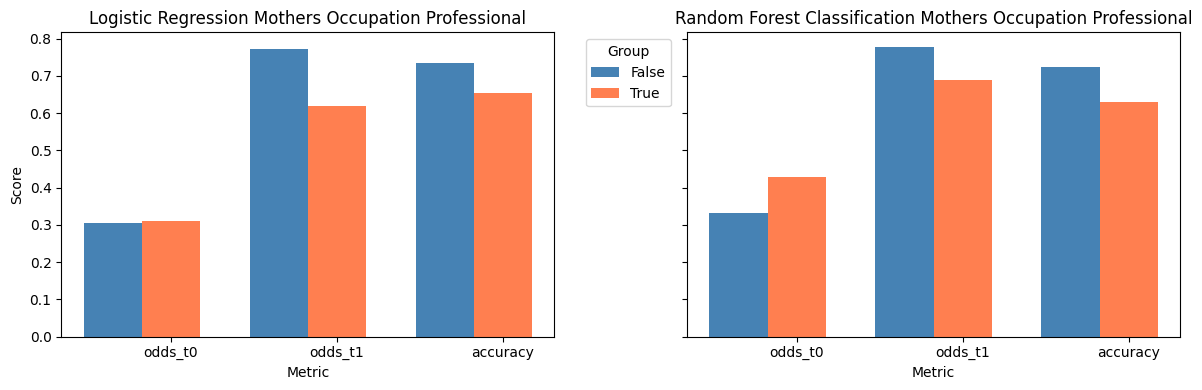

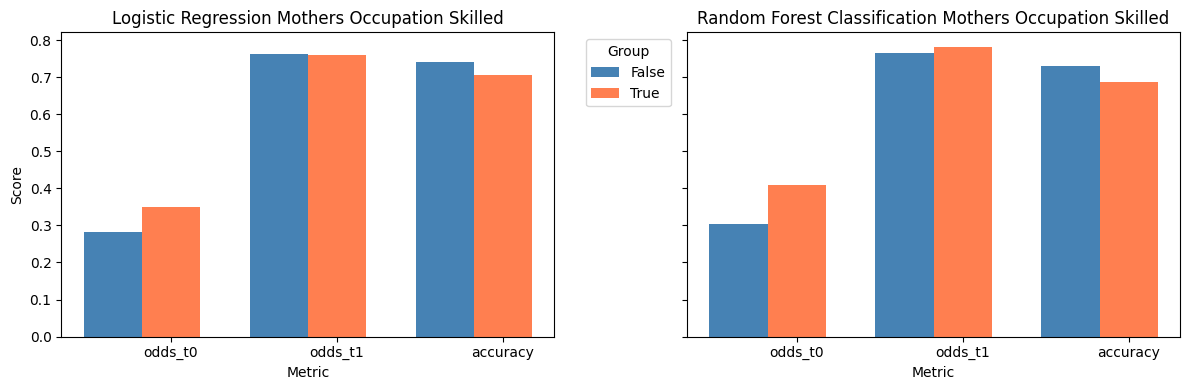

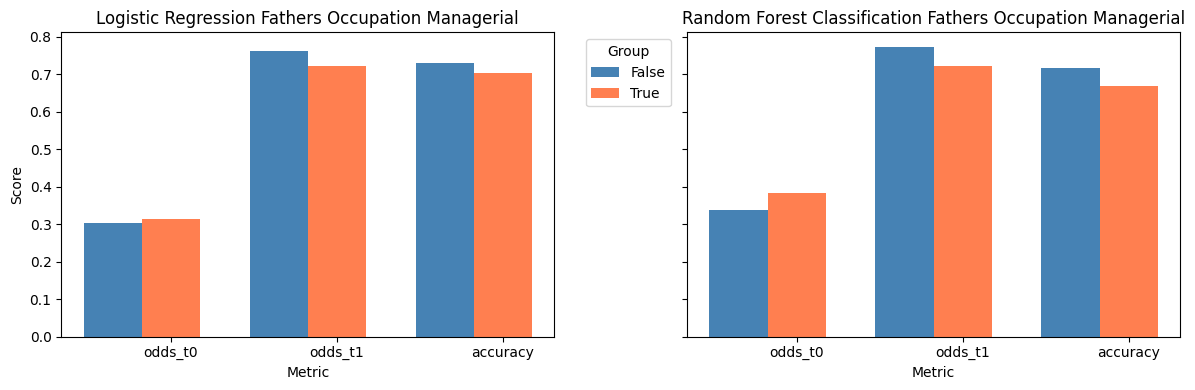

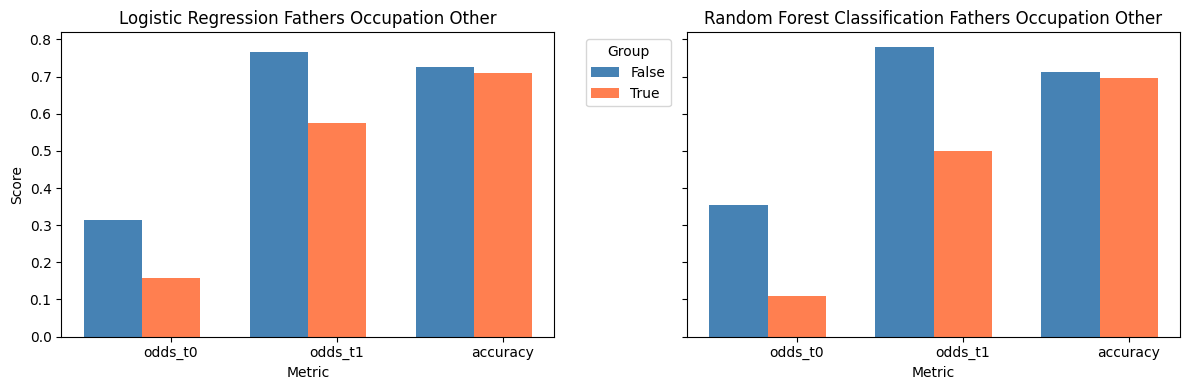

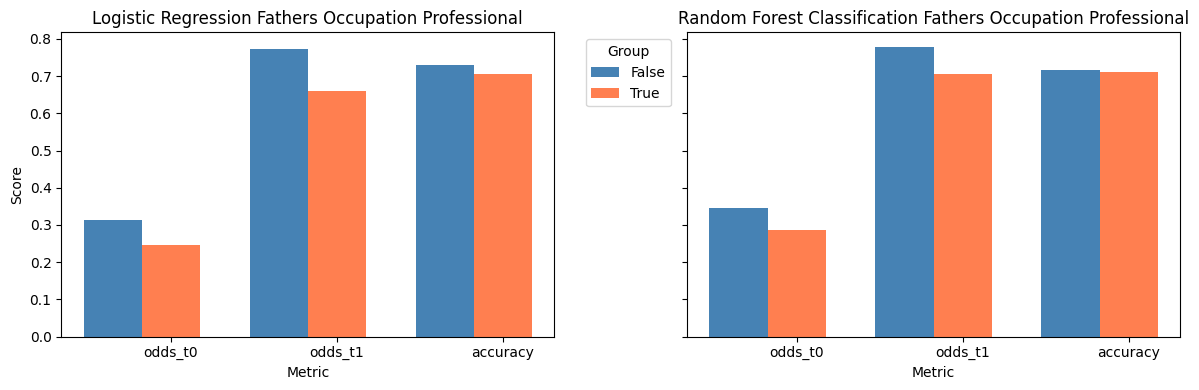

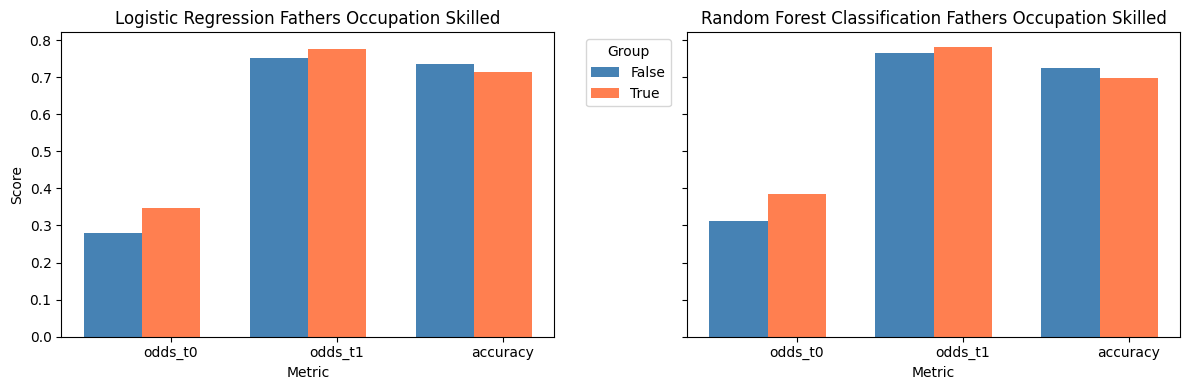

In [20]:
for g in groups:
    if g=='gender':
        gn = ['Female', 'Male']
    else:
        gn = ['False', 'True']
    log_metric_score = metric_scores(y_test=labels, y_pred = logreg_preds, group_test=groups[g])
    log_metric_df = metric_df(log_metric_score, group_names=gn, names=metric_names)

    RF_metric_score = metric_scores(y_test=labels, y_pred = RFclf_preds, group_test=groups[g])
    RF_metric_df = metric_df(RF_metric_score, group_names=gn, names=metric_names)

    plot_scores_and_group_compare(log_metric_df, RF_metric_df, titles=[f'Logistic Regression {g.replace("_", " ").title()}',f'Random Forest Classification {g.replace("_", " ").title()}'], color_palette=['steelblue', 'coral'], figsize=(12,4))


In [21]:
logreg_preds_pca = cross_validator(model=logreg, X=features, y=labels, protected_cols=protected_cols, debias='fairPCA')

print("classification report:\n",classification_report(labels, logreg_preds_pca))

print('\n', '*'*50, '\n')

RFclf_preds_pca = cross_validator(model=RFclf, X=features, y=labels, protected_cols=protected_cols, debias='fairPCA')

print(classification_report(labels, RFclf_preds_pca))

classification report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68      2215
           1       0.68      0.74      0.71      2209

    accuracy                           0.70      4424
   macro avg       0.70      0.70      0.70      4424
weighted avg       0.70      0.70      0.70      4424


 ************************************************** 

              precision    recall  f1-score   support

           0       0.72      0.65      0.69      2215
           1       0.68      0.75      0.71      2209

    accuracy                           0.70      4424
   macro avg       0.70      0.70      0.70      4424
weighted avg       0.70      0.70      0.70      4424



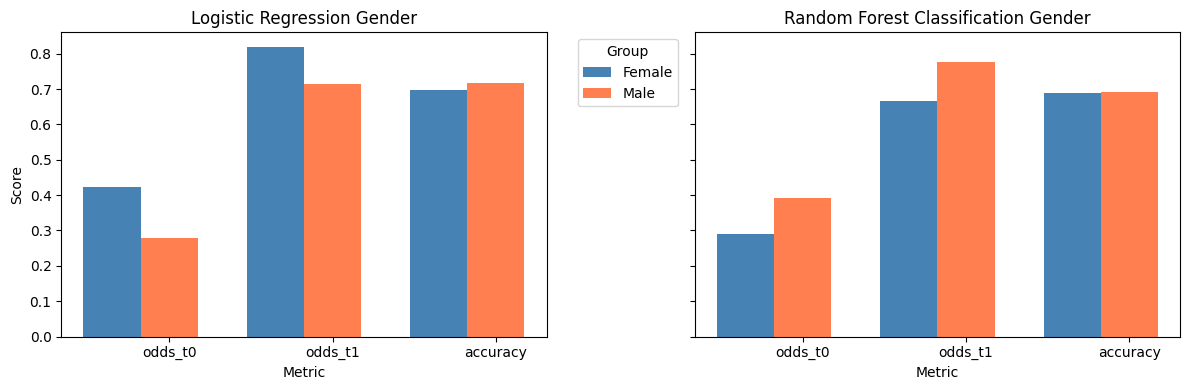

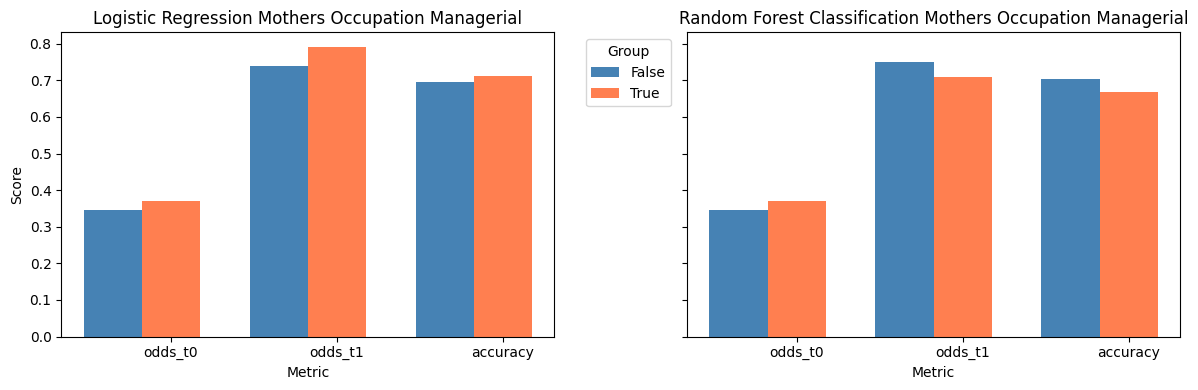

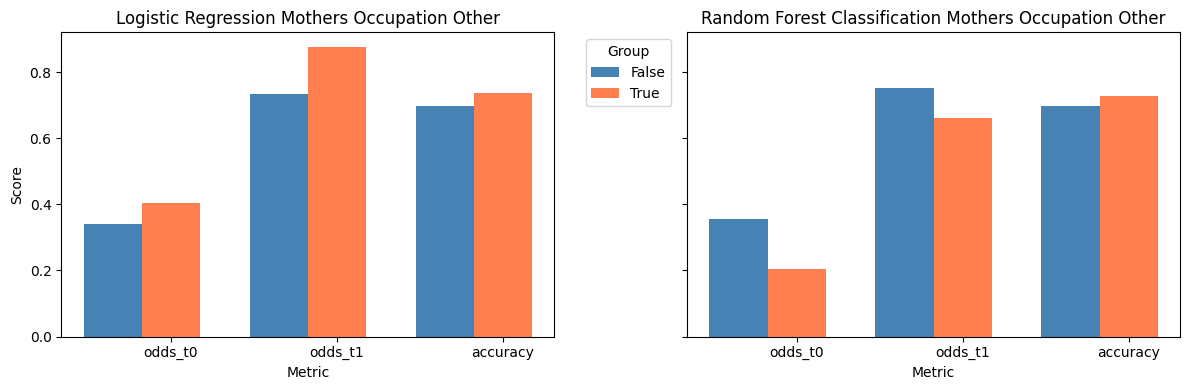

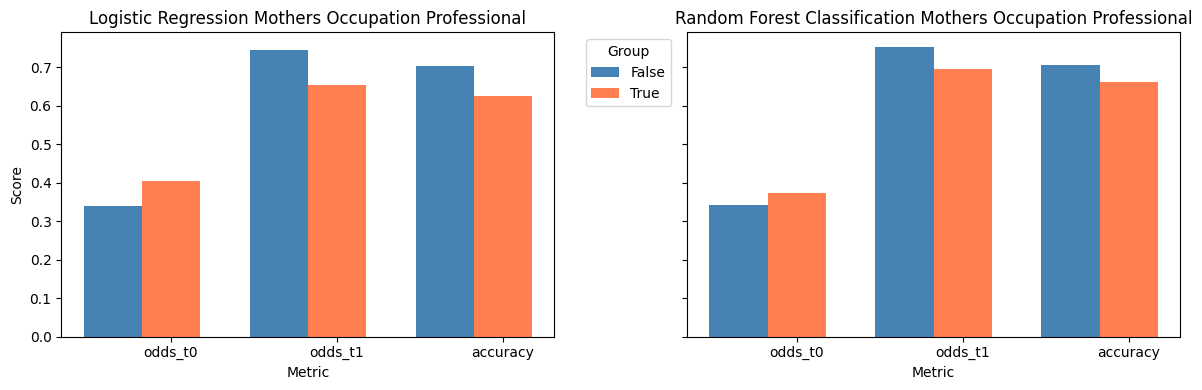

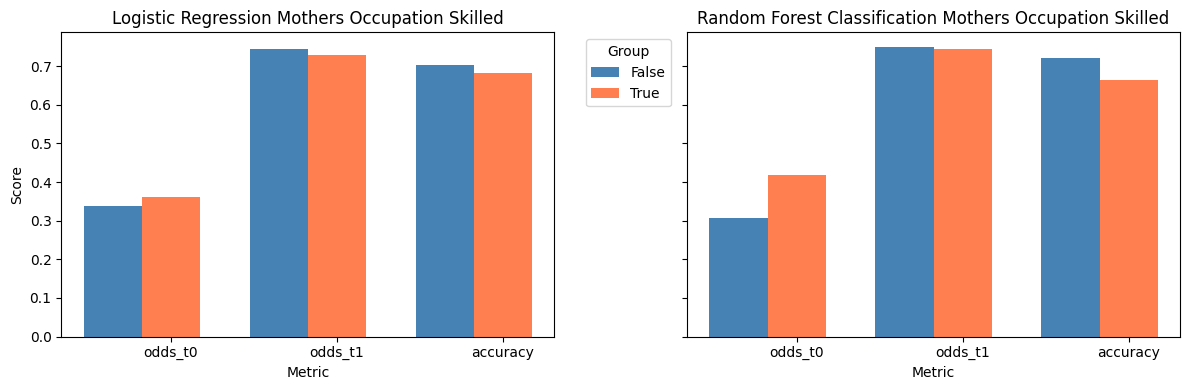

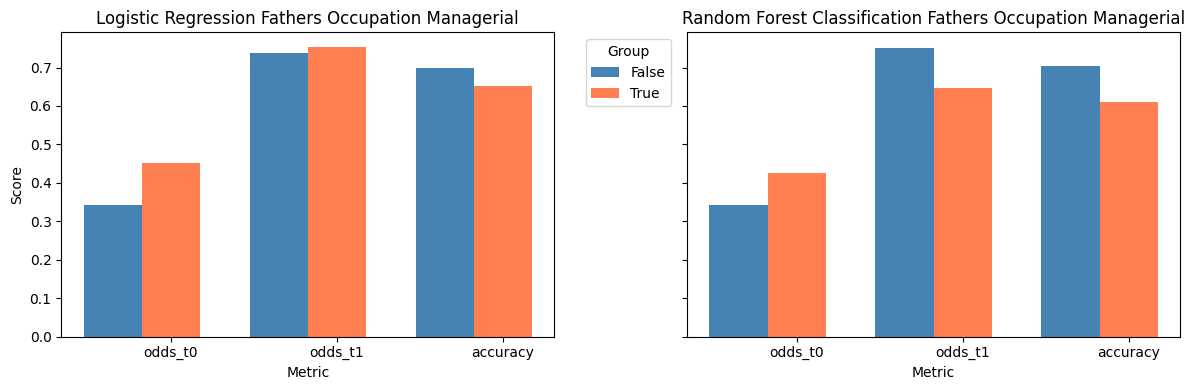

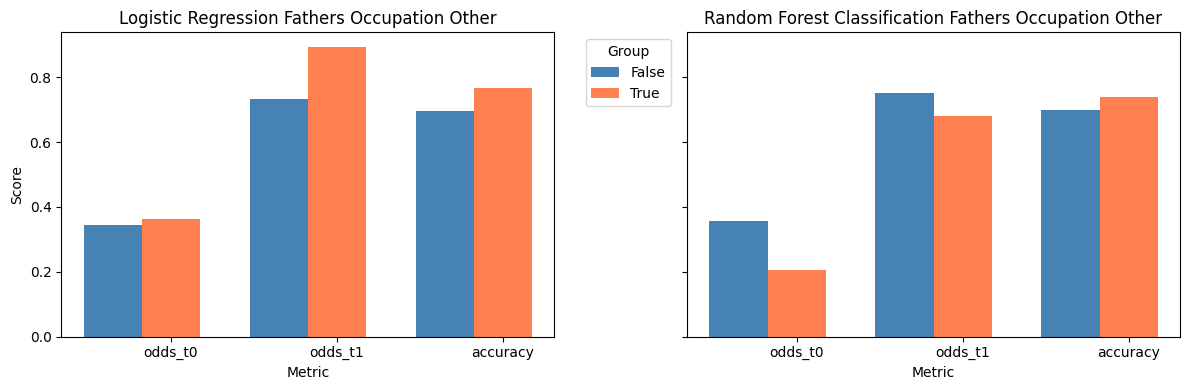

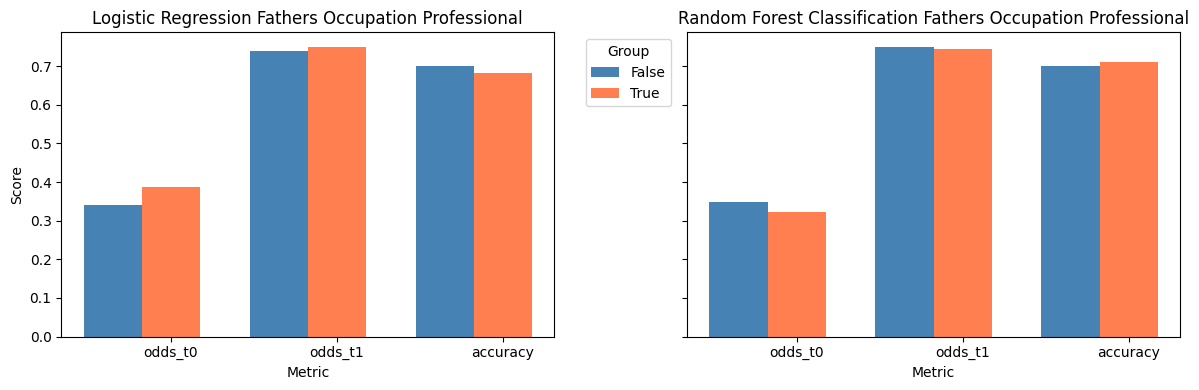

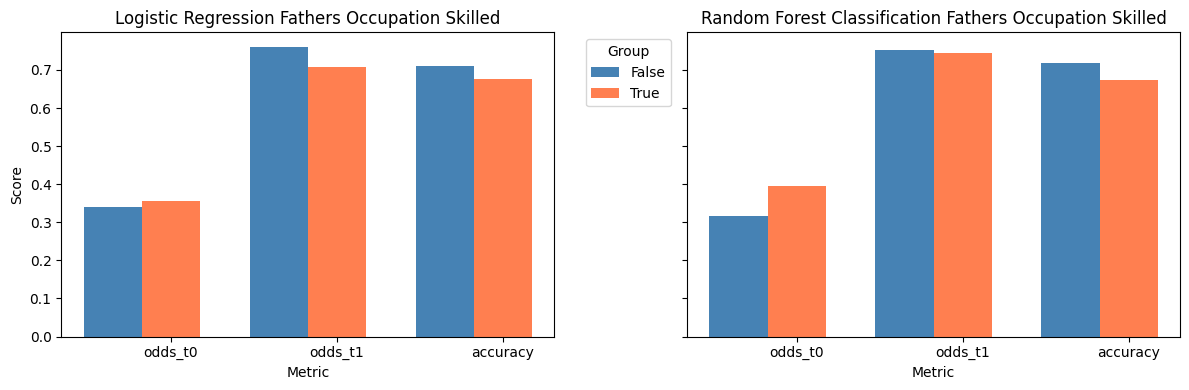

In [22]:
for g in groups:
    if g=='gender':
        gn = ['Female', 'Male']
    else:
        gn = ['False', 'True']
    log_metric_score = metric_scores(y_test=labels, y_pred = logreg_preds_pca, group_test=groups[g])
    log_metric_df = metric_df(log_metric_score, group_names=gn, names=metric_names)

    RF_metric_score = metric_scores(y_test=labels, y_pred = RFclf_preds_pca, group_test=groups[g])
    RF_metric_df = metric_df(RF_metric_score, group_names=gn, names=metric_names)

    plot_scores_and_group_compare(log_metric_df, RF_metric_df, titles=[f'Logistic Regression {g.replace("_", " ").title()}',f'Random Forest Classification {g.replace("_", " ").title()}'], color_palette=['steelblue', 'coral'], figsize=(12,4))


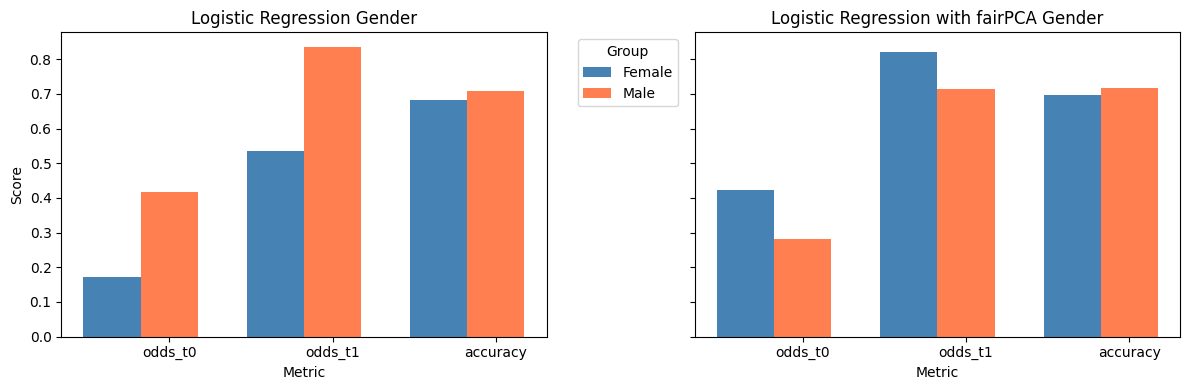

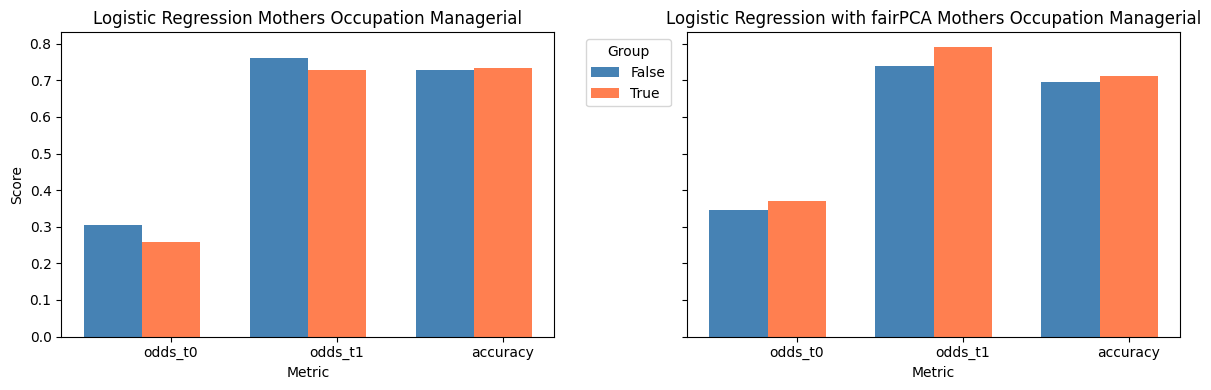

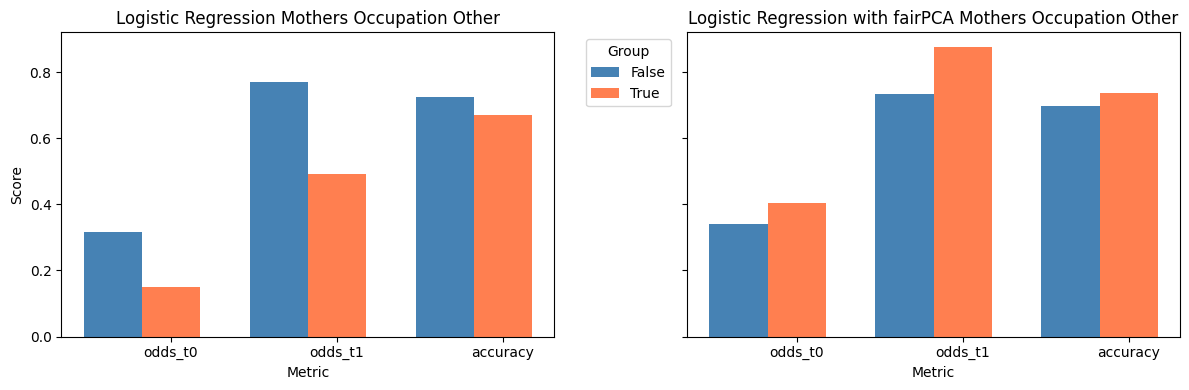

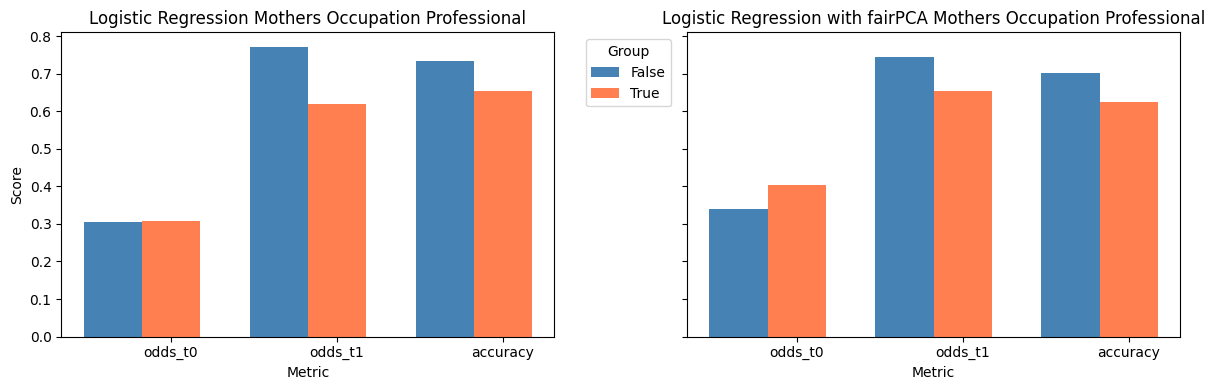

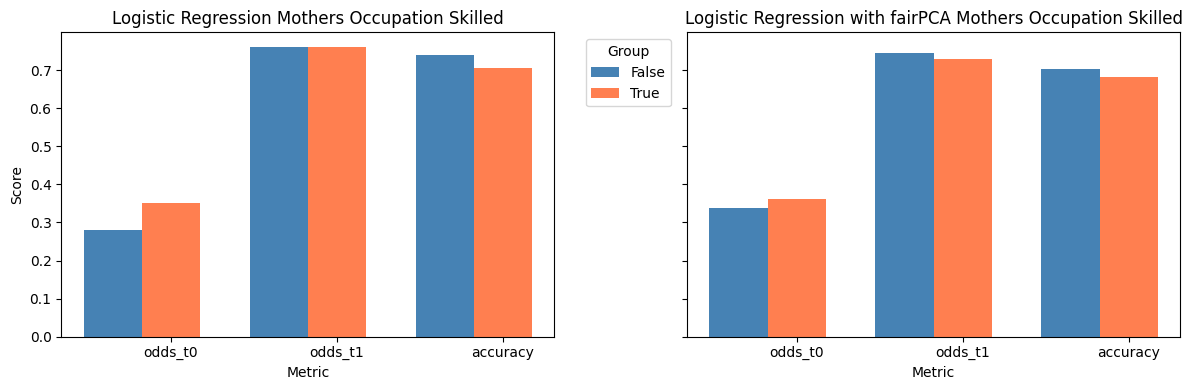

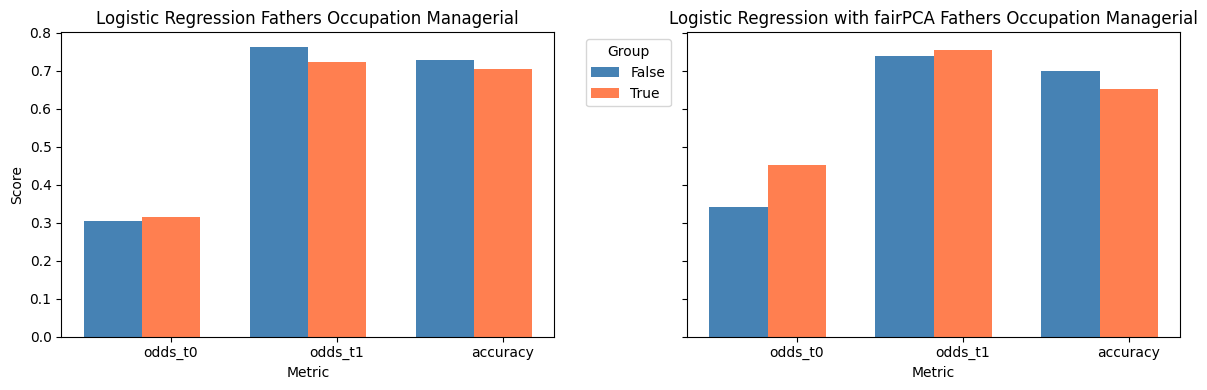

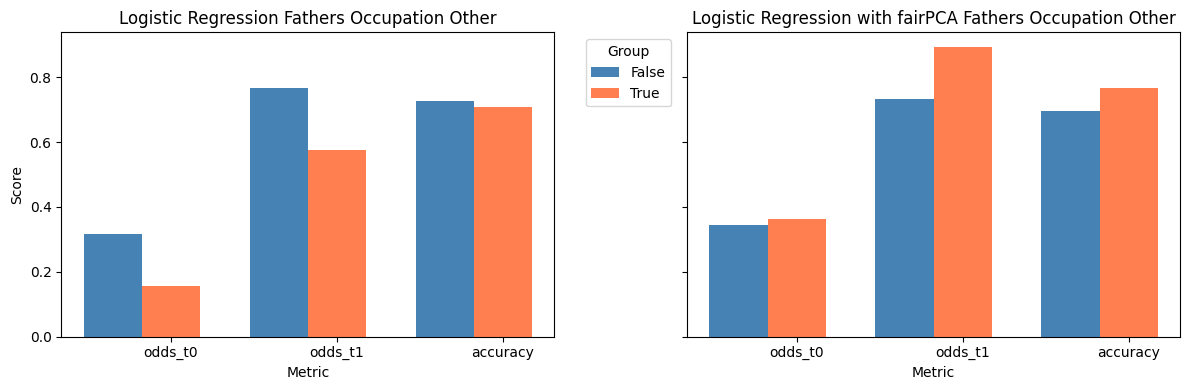

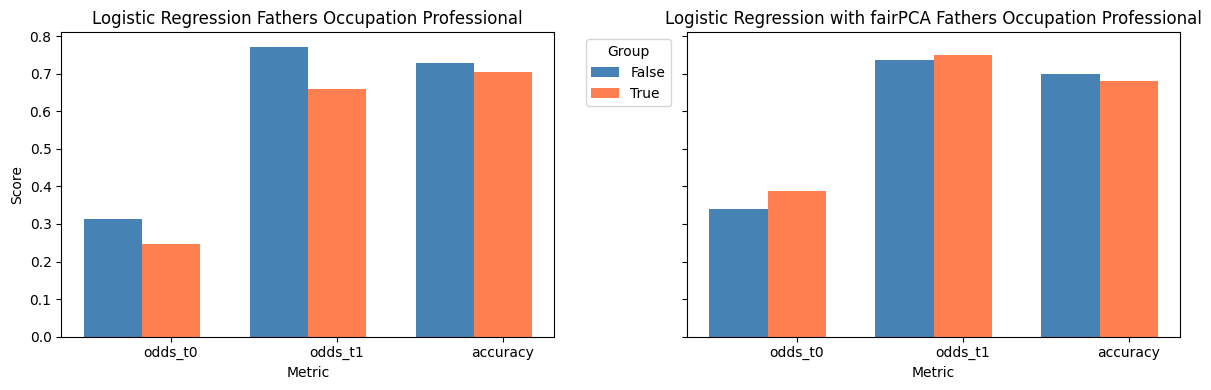

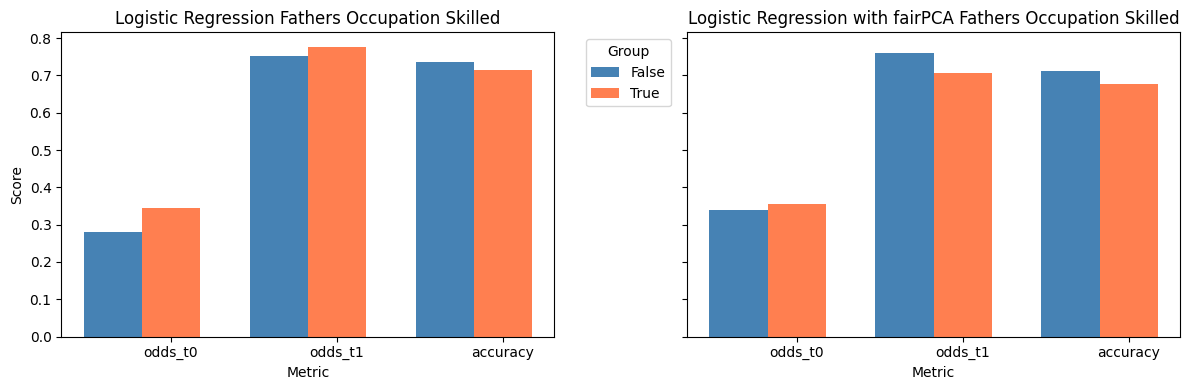

In [23]:
for g in groups:
    if g=='gender':
        gn = ['Female', 'Male']
    else:
        gn = ['False', 'True']
    log_metric_score = metric_scores(y_test=labels, y_pred = logreg_preds, group_test=groups[g])
    log_metric_df = metric_df(log_metric_score, group_names=gn, names=metric_names)

    log_metric_score_pca = metric_scores(y_test=labels, y_pred = logreg_preds_pca, group_test=groups[g])
    log_metric_df_pca = metric_df(log_metric_score_pca, group_names=gn, names=metric_names)

    
    plot_scores_and_group_compare(log_metric_df, log_metric_df_pca, titles=[f'Logistic Regression {g.replace("_", " ").title()}',f'Logistic Regression with fairPCA {g.replace("_", " ").title()}'], color_palette=['steelblue', 'coral'], figsize=(12,4))


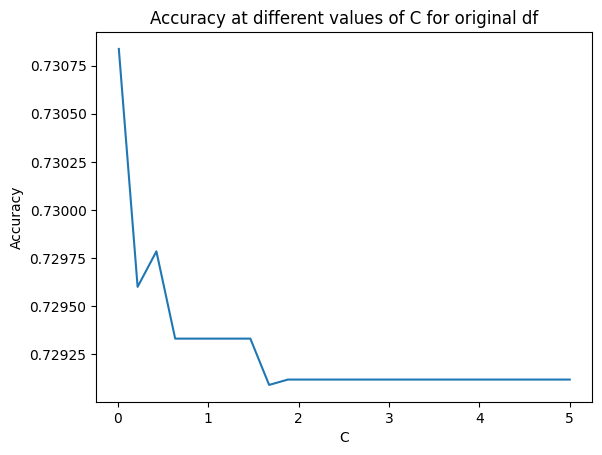

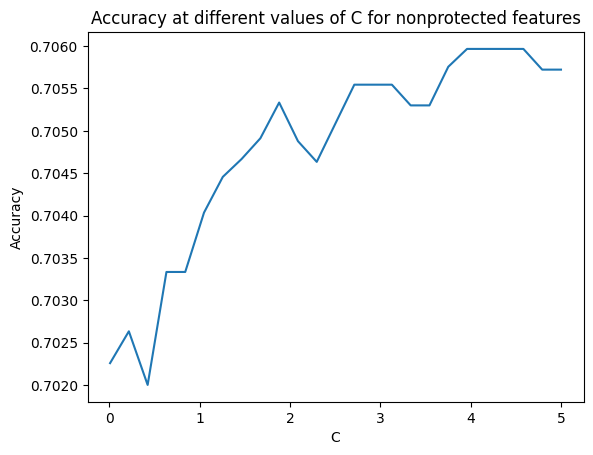

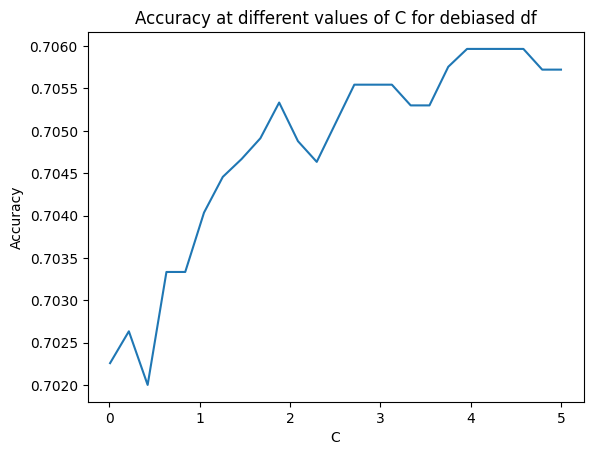

In [24]:
tune_hyper_params(features=features, model = LogisticRegression, param_to_tune='C', fixed_model_params = {'random_state':seed, 'max_iter':1000}, param_values = np.linspace(start=0.01,stop=5,num=25), protected_cols=protected_cols, labels=labels)

In [25]:
[weights_origin_data, weights_np, _], pca = feature_weights(features=features, protected_cols=protected_cols, labels=labels,
                                                         model=LogisticRegression(max_iter=1000,  random_state=seed, C=0.05), top_n=10)          

In [26]:
weights_origin_data

,coef,odds
tuition_fees_up_to_date,1.656,5.237
course_informatics_engineering,-1.030,0.357
scholarship_holder,0.992,2.698
course_basic_education,-0.782,0.458
debtor,-0.769,0.464
application_mode_over_23_years_old,-0.615,0.540
course_management,-0.581,0.559
gender,-0.504,0.604
course_social_service,0.487,1.627
course_equinculture,-0.413,0.661


In [27]:
weights_np.index[0]

9

In [28]:
# look at PCA component is giving the most signal to the model
# so we can look into it's make up:
pca_comp = weights_np.index[0]

comp = list(pca.U[pca_comp])

cols = [x for x in features.columns if x not in protected_cols]

pca_1 = [x for x in zip(comp, cols)]

pca_1.sort(reverse=True, key=lambda x: abs(x[0]))

# just the 10 largest contributors, because there are 95 features!
pca_1[:10]

[(0.6619389625411676, 'scholarship_holder'),
 (-0.4371381464093854, 'inflation_rate'),
 (0.3815059474958344, 'age_at_enrollment'),
 (0.32744801335488666, 'international'),
 (-0.15548572245034203, 'application_order'),
 (0.12030349705908805,
  'application_mode_1st_phase_special_contingent_madeira_island'),
 (0.10882321092630137, 'application_mode_2nd_phase_general_contingent'),
 (0.08530800520290685, 'tuition_fees_up_to_date'),
 (-0.0785189736720043, 'educational_special_needs'),
 (0.06012639950776844, 'unemployment_rate')]

Lambda 0.0 completed
Lambda 0.1 completed
Lambda 0.2 completed
Lambda 0.3 completed
Lambda 0.4 completed
Lambda 0.5 completed
Lambda 0.6 completed
Lambda 0.7 completed
Lambda 0.8 completed
Lambda 0.9 completed
Lambda 1.0 completed


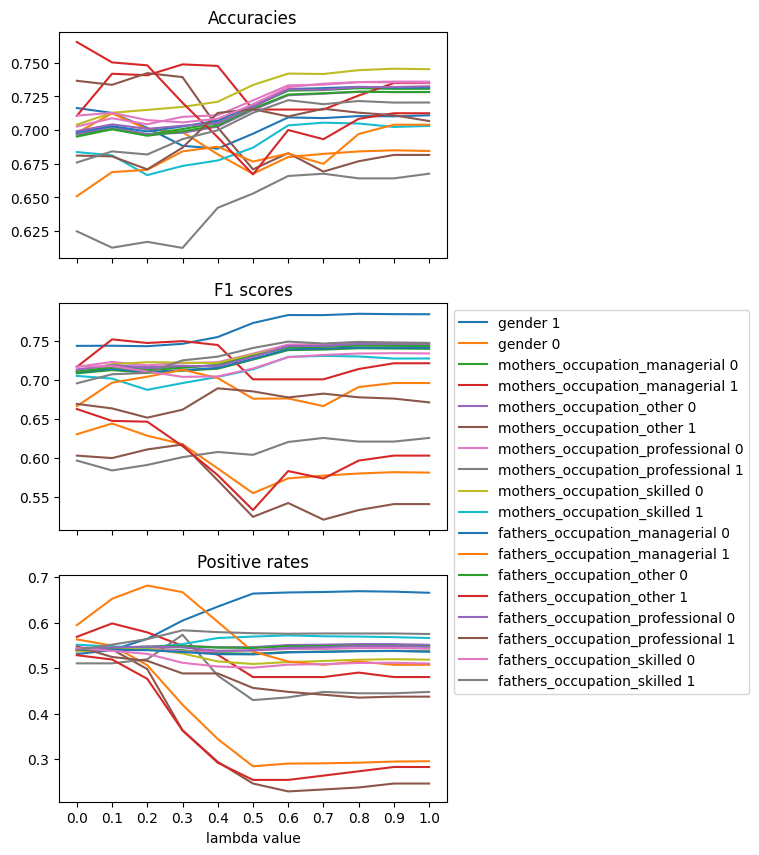

In [29]:
lambda_values, accuracies, f1_scores, positive_rates = tune_lambda(model=LogisticRegression(max_iter=1000, random_state=seed), X=features, y=labels, protected_cols=protected_cols, groups=groups)

plot_tune_lambda(lambda_values, accuracies, f1_scores, positive_rates)

In [30]:
# Looking at a basic logreg model, no C, no pca etc.
logreg = LogisticRegression(max_iter=1000, random_state=seed)

logreg.fit(features, labels)

feats = list(logreg.feature_names_in_)

In [31]:
explainer_LR = shap.Explainer(logreg, features, feature_names=np.array(feats))

shap_values_LR = explainer_LR(features)

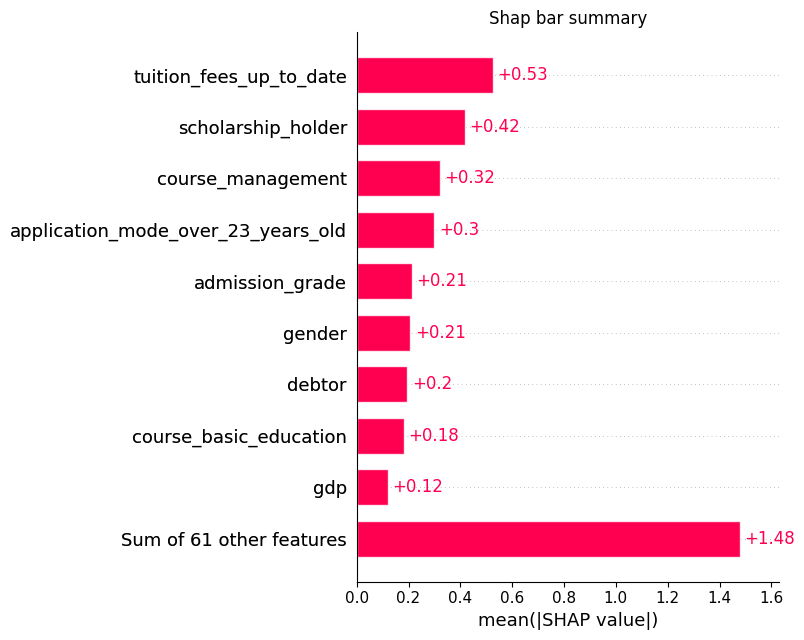

In [32]:
shap.plots.bar(shap_values_LR, max_display=10,show=False)
plt.title(f'Shap bar summary')
plt.tight_layout()

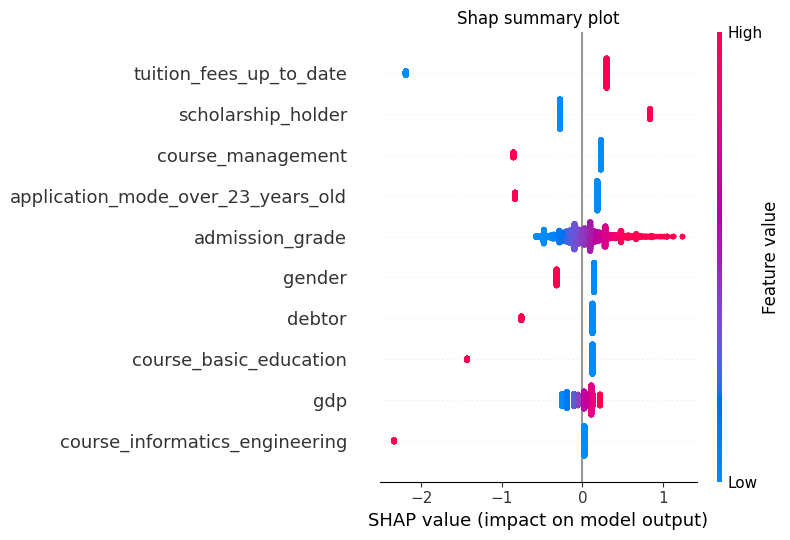

In [33]:
shap.summary_plot(shap_values_LR.values.astype('float64'), 
                  features.astype('float64'), 
                  feature_names=feats, 
                  max_display=10, 
                  show=False)
plt.title(f'Shap summary plot')
plt.tight_layout()